In [20]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [21]:
batchsize=32

In [22]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory('./data/prepared_data/train',
target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory('./data/prepared_data/train',
target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 64820 images belonging to 2 classes.
Found 16203 images belonging to 2 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('./data/prepared_data/test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 3875 images belonging to 2 classes.


In [24]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = GlobalAveragePooling2D(name='avg_pool')(hmodel)
# hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.4)(hmodel)
prediction = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= prediction)
for layer in bmodel.layers:
    layer.trainable = False

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_188 (Conv2D)            (None, 39, 39, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 39, 39, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_188 (Activation)    (None, 39, 39, 32)   0           ['batch_normalization_188[0

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 7, 7, 32)    96          ['conv2d_199[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_193 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_193[0][0]']
                                                                                                  
 activation_195 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_195[0][0]']
                                                                                                  
 activation_198 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_198[0][0]']
          

                                                                                                  
 conv2d_211 (Conv2D)            (None, 7, 7, 96)     55296       ['activation_210[0][0]']         
                                                                                                  
 batch_normalization_208 (Batch  (None, 7, 7, 48)    144         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_211 (Batch  (None, 7, 7, 96)    288         ['conv2d_211[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_208 (Activation)    (None, 7, 7, 48)     0           ['batch_normalization_208[0][0]']
          

                                                                                                  
 conv2d_222 (Conv2D)            (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_222 (Batch  (None, 3, 3, 128)   384         ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_222[0][0]']
                                                                                                  
 conv2d_223 (Conv2D)            (None, 3, 3, 128)    114688      ['activation_222[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 activation_232 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_233 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_232[0][0]']         
                                                                                                  
 batch_normalization_233 (Batch  (None, 3, 3, 160)   480         ['conv2d_233[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_233 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_233[0][0]']
                                                                                                  
 conv2d_22

 batch_normalization_243 (Batch  (None, 3, 3, 160)   480         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_243 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_244 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_243[0][0]']         
                                                                                                  
 batch_normalization_239 (Batch  (None, 3, 3, 160)   480         ['conv2d_239[0][0]']             
 Normaliza

 conv2d_249 (Conv2D)            (None, 3, 3, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 3, 3, 192)    258048      ['activation_253[0][0]']         
                                                                                                  
 batch_normalization_249 (Batch  (None, 3, 3, 192)   576         ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_254 (Batch  (None, 3, 3, 192)   576         ['conv2d_254[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 3, 3, 192)   576         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_258 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_258[0][0]']
                                                                                                  
 activation_262 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_262[0][0]']
                                                                                                  
 conv2d_259 (Conv2D)            (None, 1, 1, 320)    552960      ['activation_258[0][0]']         
          

 activation_267 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_270[0][0]']
                                                                                                  
 activation_271 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_271[0][0]']
                                                                                                  
 batch_normalization_272 (Batch  (None, 1, 1, 192)   576         ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_264 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_264[0][0]']
          

 batch_normalization_281 (Batch  (None, 1, 1, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_273 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_273[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_275[0][0]',         
                                                                  'activation_276[0][0]']         
                                                                                                  
 concatenate_5 (Concatenate)    (None, 1, 1, 768)    0           ['activation_279[0][0]',         
                                                                  'activation_280[0][0]']         
          

In [26]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.pdf', show_shapes=True, show_layer_names=True)

In [27]:
checkpoint = ModelCheckpoint('./models/model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=2, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [28]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

m=model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=15)

Epoch 1/15
2025/2025 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.9060
Epoch 1: val_loss improved from inf to 0.25394, saving model to ./models/model.h5
2025/2025 [==============================] - 1508s 743ms/step - loss: 0.2368 - accuracy: 0.9060 - val_loss: 0.2539 - val_accuracy: 0.8979 - lr: 0.0010
Epoch 2/15
2025/2025 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.9136
Epoch 2: val_loss improved from 0.25394 to 0.24752, saving model to ./models/model.h5
2025/2025 [==============================] - 1212s 598ms/step - loss: 0.2257 - accuracy: 0.9136 - val_loss: 0.2475 - val_accuracy: 0.9072 - lr: 0.0010
Epoch 3/15
2025/2025 [==============================] - ETA: 0s - loss: 0.2278 - accuracy: 0.9146
Epoch 3: val_loss did not improve from 0.24752
2025/2025 [==============================] - 364s 180ms/step - loss: 0.2278 - accuracy: 0.9146 - val_loss: 0.2711 - val_accuracy: 0.8954 - lr: 0.0010
Epoch 4/15
2025/2025 [=================

In [9]:
# Model Evaluation

In [16]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

199/501 [==========>...................] - ETA: 25s - loss: 0.1921 - accuracy: 0.9229

KeyboardInterrupt: 

In [ ]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

In [17]:
import matplotlib.pyplot as plt

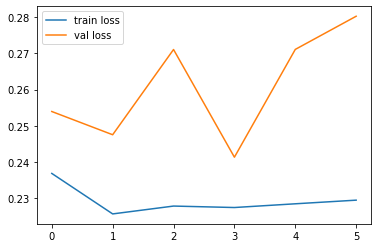

In [29]:
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [31]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

 23/122 [====>.........................] - ETA: 9s - loss: 0.1464 - accuracy: 0.9416

KeyboardInterrupt: 

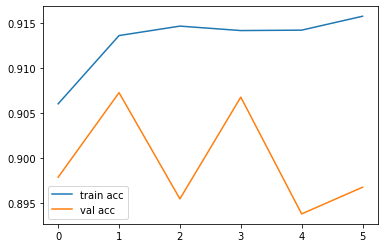

In [32]:
plt.plot(m.history['accuracy'], label='train acc')
plt.plot(m.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [33]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("./models/model.json", "w") as json_file:
    json_file.write(model_json)
